## Dataset Link
https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

### Install Libraries, Packages and dataset

In [4]:
!git clone https://github.com/parth1620/Facial-Expression-Dataset.git

python(20473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


fatal: destination path 'Facial-Expression-Dataset' already exists and is not an empty directory.


In [5]:
!pip install -U git+https://github.com/albumentations-team/albumentations

python(20476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Cloning https://github.com/albumentations-team/albumentations to /private/var/folders/_x/kvs2mx1s5bs08dcbp6_xfwfc0000gn/T/pip-req-build-nhnjsujt
  Running command git clone --quiet https://github.com/albumentations-team/albumentations /private/var/folders/_x/kvs2mx1s5bs08dcbp6_xfwfc0000gn/T/pip-req-build-nhnjsujt
  Resolved https://github.com/albumentations-team/albumentations to commit 82818a0c4a80924d9f903a656c7f549ec6ca9cb2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 605.4 kB/s eta 0:00:0000:0100:02
  Created wheel for albumentations: filename=albumentations-1.3.1-py3-none-any.whl size=125877 sha256=b168e7ec37457264cffa421c8a079c2fd8c07779ce378355cd4303c60582bbce
  Stored in directory: /private/var/folders/_x/kvs2mx1s5bs08dcbp6_xfwfc0000gn/T/pip-ephem-wheel-cache-0a6fuh8t/wheels/51/4d/ab/5aafa8b980086fbc362946de7da4aa3df33aacb3da0da29b93
Successfully built albumentations


In [3]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 572.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 648.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 703.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 434.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 449.9 kB/s eta 0:00:0000:0100:04
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


In [6]:
!pip install --upgrade opencv-contrib-python

python(20534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 600.4 kB/s eta 0:00:0000:0100:07


# Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [8]:
TRAIN_IMG_FOLDER_PATH = "/Volumes/MacOS Disk 1/Mac Jupyter Notebook/Facial Expression ML/Facial-Expression-Dataset/train"
VALID_IMG_FOLDER_PATH = "/Volumes/MacOS Disk 1/Mac Jupyter Notebook/Facial Expression ML/Facial-Expression-Dataset/validation"

In [9]:
LR = 0.001
BATCH_SIZE = 32
APOCHS = 15

DEVICE = 'cuda'
MODEL_NAME = 'efficientnet_b0'

Above this part is very important to conduct the whole project, we can change any parameter from this part to conduct our entire model better than before. 

### Load Dataset

In [10]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

In [11]:
train_augs = T.Compose([
    T.RandomHorizontalFlip(p = 0.5),
    T.RandomRotation(degrees=(-20, +20)),
    T.ToTensor() #PIL / numpy arr -> torch tensor -> (h, w, c) -> (c, h, w)
])

valid_augs = T.Compose([
    T.ToTensor()
])

In [13]:
trainset = ImageFolder(TRAIN_IMG_FOLDER_PATH, transform = train_augs)
validset = ImageFolder(VALID_IMG_FOLDER_PATH, transform = train_augs)

In [14]:
len(trainset)

28821

In [15]:
len(validset)

7066

In [21]:
print(f"""
    The total number of datasets is {len(trainset) + len(validset)},
    where the training dataset has {len(trainset)} examples,
    and the validation dataset has {len(validset)} examples.
    """)



    The total number of datasets is 35887,
    where the training dataset has 28821 examples,
    and the validation dataset has 7066 examples.
    


### Plot the images

In [25]:
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


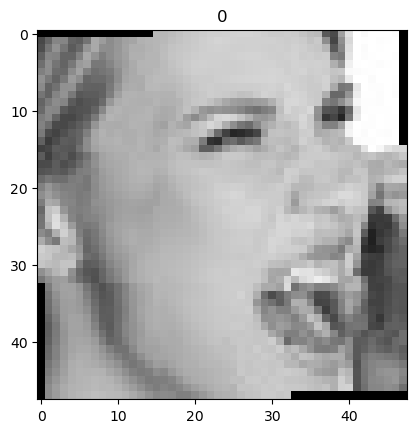

In [31]:
image, label = trainset[14]
plt.imshow(image.permute(1,2,0)) #(image comes up with height, width and channel)
plt.title(label);

Here, we see a '0' in the title of the image, which represents the facial expression of the expression depicted in the image.